# Иллюстрации для статьи «Алгоритмы поиска аномалий HBOS и ECOD»

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pyod.models.ecod import ECOD

In [2]:
base_color = '#9B4FD6'
light_color = 'white'
dark_color = '#2C313B'
background_color = 'white'

In [3]:
dpi = 150

In [4]:
np.random.seed(42)

In [5]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [6]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [7]:
offset = 3

In [8]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [9]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [10]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})])

In [11]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")#, rc=custom_style)
sns.set(rc={'axes.facecolor': background_color, 
            'axes.edgecolor': dark_color,
            'figure.facecolor': background_color, 
            'grid.color': '#b0b0b0',
            'axes.labelcolor': dark_color,
            'xtick.color': dark_color,
            'ytick.color': dark_color})

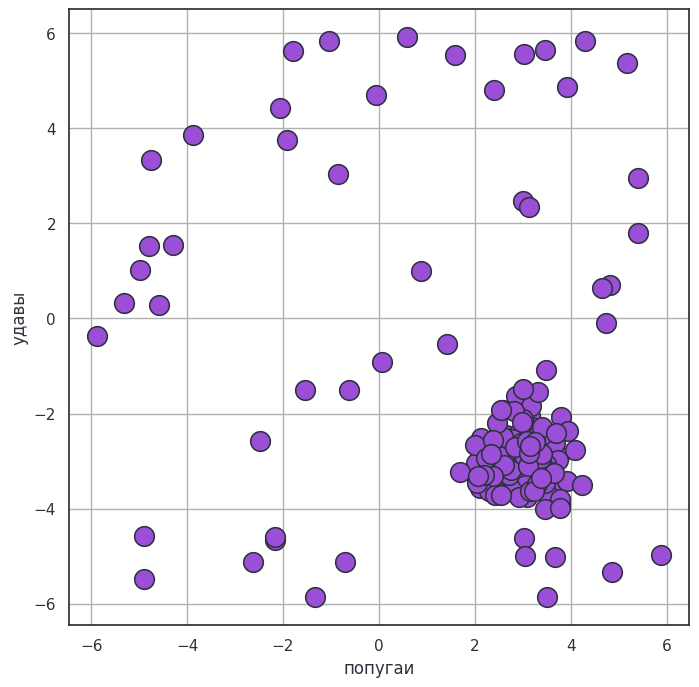

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data, x='попугаи', y='удавы', color=base_color, s=200, edgecolor=dark_color)
plt.savefig("imgs/img_5.png", dpi=dpi, bbox_inches='tight', transparent=False)

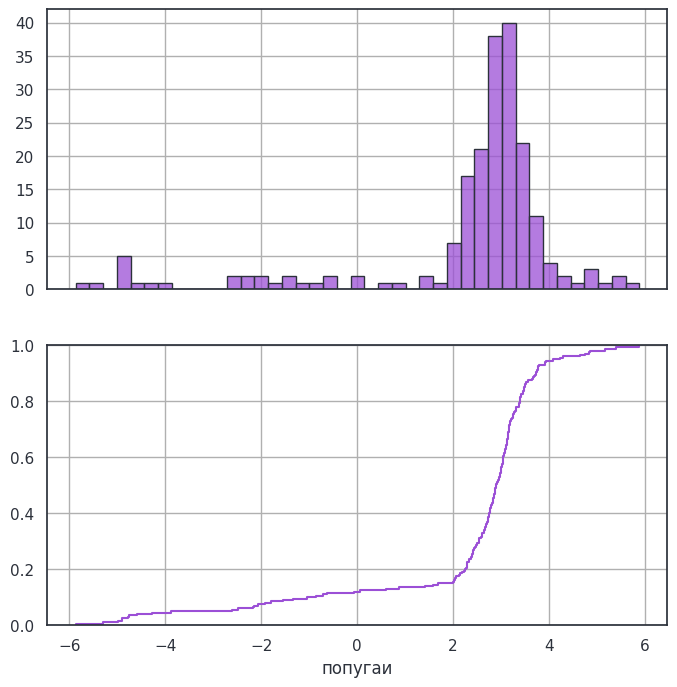

In [13]:
_, [axs_hist, axs_ecdf] = plt.subplots(2, 1,
                                       figsize=(8, 8), 
                                       sharex=True,
                                       gridspec_kw=dict(height_ratios=[1,1]))

ax = sns.histplot(data, x='попугаи', ax=axs_hist, color=base_color, edgecolor=dark_color)
ax.set(ylabel='')
ax = sns.ecdfplot(data, x='попугаи', ax=axs_ecdf, color=base_color)
ax.set(ylabel='')
plt.savefig("imgs/img_6.png", dpi=dpi, bbox_inches='tight', transparent=False)

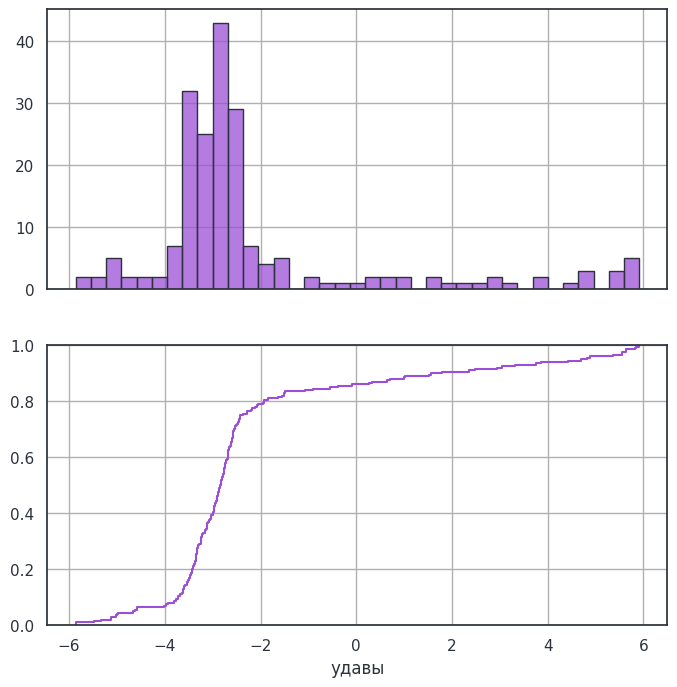

In [14]:
_, [axs_hist, axs_ecdf] = plt.subplots(2, 1,
                                       figsize=(8, 8), 
                                       sharex=True,
                                       gridspec_kw=dict(height_ratios=[1,1]))
ax = sns.histplot(data, x='удавы', ax=axs_hist, color=base_color, edgecolor=dark_color)
ax.set(ylabel='')
ax = sns.ecdfplot(data, x='удавы', ax=axs_ecdf, color=base_color)
ax.set(ylabel='')
plt.savefig("imgs/img_7.png", dpi=dpi, bbox_inches='tight', transparent=False)

In [15]:
model=ECOD()

In [16]:
model.fit(data[['попугаи', 'удавы']])

ECOD(contamination=0.1, n_jobs=1)

In [17]:
data['ECOD'] = model.decision_scores_

In [18]:
palette = f"blend:{base_color},{light_color}"

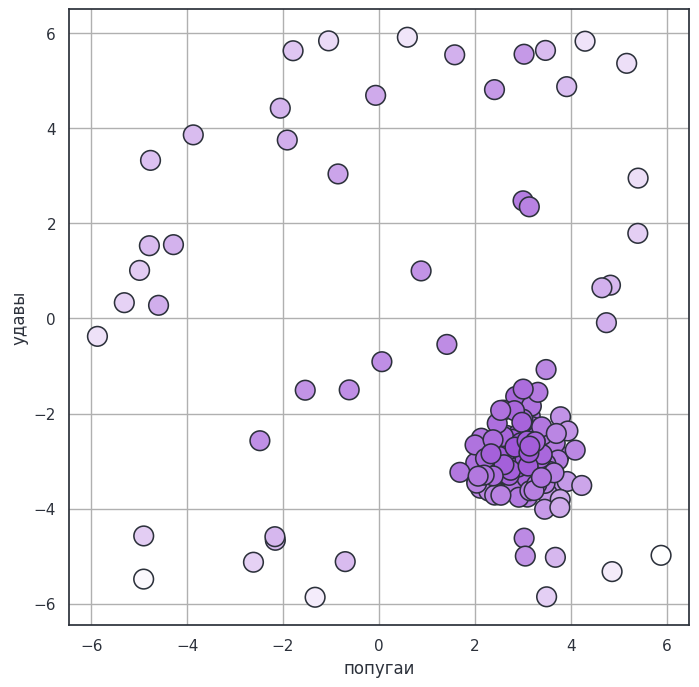

In [19]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data, x='попугаи', y='удавы', hue='ECOD', legend=False, s=200, 
                     palette=sns.color_palette(palette, as_cmap=True), edgecolor=dark_color)
plt.savefig("imgs/img_8.png", dpi=dpi, bbox_inches='tight', transparent=False)